In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Вариант

In [7]:
variant = 8 # Изменяйте ТОЛЬКО значение варианта 
 
test_signal_duration = 100 
dt = 0.01 
test_sig_ampl = 1 + variant * 0.1 
test_sig_freq = 1 + variant * 3.5 
non_lin_param_1 = 0.5 + variant * 0.1 
lin_param_k = 0.5 + variant * 0.3 
lin_param_T = 0.1 + variant * 0.2 
 
print("Вариант номер {}".format(variant)) 
print("Период дискретизации сигнала: {:.2} с".format(dt)) 
print("Амплитуда  тестового  сигнала: {:.2}".format(test_sig_ampl)) 
print("Частота  тестового  сигнала:  {:.2} Гц".format(test_sig_freq)) 
print("Длительность  тестового  сигнала:  {} с".format(test_signal_duration)) 
print("Параметр  нелинейностей  1: {:.2}".format(non_lin_param_1)) 
print("Коэффициент  усиления  линейного  звена: {:.2}".format(lin_param_k)) 
print("Постоянная  времени  линейного  звена: {:.2}".format(lin_param_T))


Вариант номер 8
Период дискретизации сигнала: 0.01 с
Амплитуда  тестового  сигнала: 1.8
Частота  тестового  сигнала:  2.9e+01 Гц
Длительность  тестового  сигнала:  100 с
Параметр  нелинейностей  1: 1.3
Коэффициент  усиления  линейного  звена: 2.9
Постоянная  времени  линейного  звена: 1.7


# Зададим вектор времени

In [8]:
t = np.arange(0, test_signal_duration, dt) 
 
print("Размерность массива: {}".format(t.shape)) 
print("Содержимое массива: {}".format(t)) 

Размерность массива: (10000,)
Содержимое массива: [0.000e+00 1.000e-02 2.000e-02 ... 9.997e+01 9.998e+01 9.999e+01]


Зададим sin

In [9]:
sig_sin = np.sin(t * 2 * np.pi) 
 
print("Размерность сигнала: {}".format(sig_sin.shape)) 
print("Содержимое массива сигнала: {}".format(sig_sin))

Размерность сигнала: (10000,)
Содержимое массива сигнала: [ 0.          0.06279052  0.12533323 ... -0.18738131 -0.12533323
 -0.06279052]


Выведем график

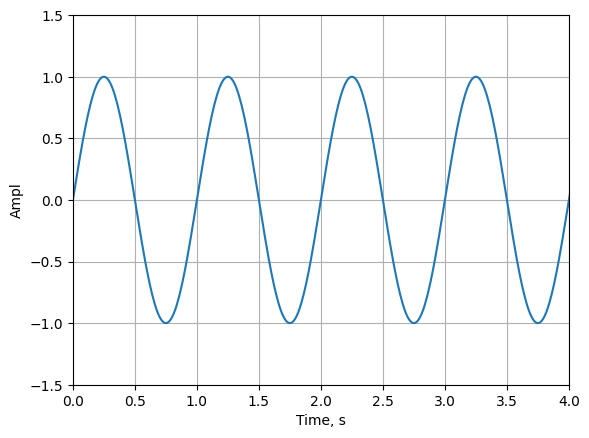

In [10]:
plt.grid() 
plt.xlabel('Time, s') 
plt.ylabel('Ampl') 
plt.ylim(-1.5, 1.5) 
plt.xlim(0, 4) 
plt.plot(t, sig_sin) 

Спектр сигнала

In [11]:
sig_sin_spec = np.abs(np.fft.fft(sig_sin)) 
print("Размерность массива спектра: {}".format(sig_sin_spec.shape)) 
print("Содержимое массива спектра: {}".format(sig_sin_spec)) 

Размерность массива спектра: (10000,)
Содержимое массива спектра: [5.23685120e-14 4.45462047e-13 2.36038577e-13 ... 3.06150389e-13
 2.36038577e-13 4.45462047e-13]


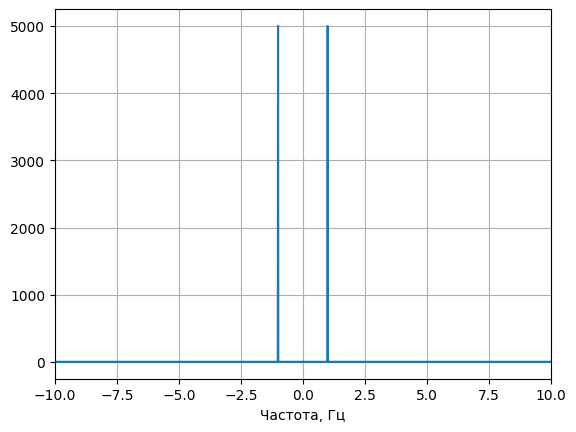

In [ ]:
freqs = np.fft.fftfreq(sig_sin.shape[0], dt)

plt.grid() 
plt.xlabel('Частота, Гц') 
plt.xlim(-10, 10) 
plt.plot(freqs, sig_sin_spec) 

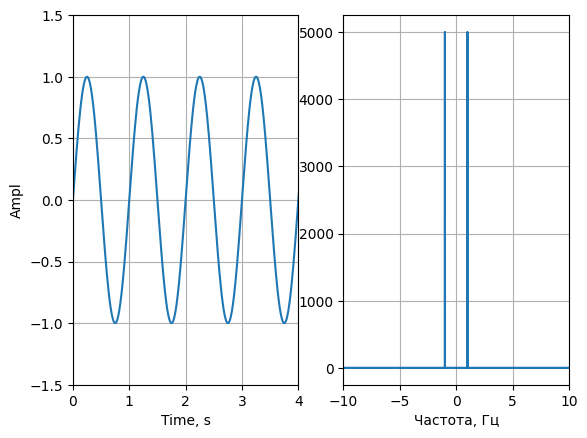

In [13]:
plt.subplot(1, 2, 1) 
plt.grid() 
plt.xlabel('Time, s') 
plt.ylabel('Ampl') 
plt.ylim(-1.5, 1.5) 
plt.xlim(0, 4) 
plt.plot(t, sig_sin) 
 
plt.subplot(1, 2, 2) 
plt.grid() 
plt.xlabel('Частота, Гц') 
plt.xlim(-10, 10) 
plt.plot(freqs, sig_sin_spec)

Другие сигналы

Пилообразный сигнал

In [14]:
pil_signal = signal.sawtooth(t)

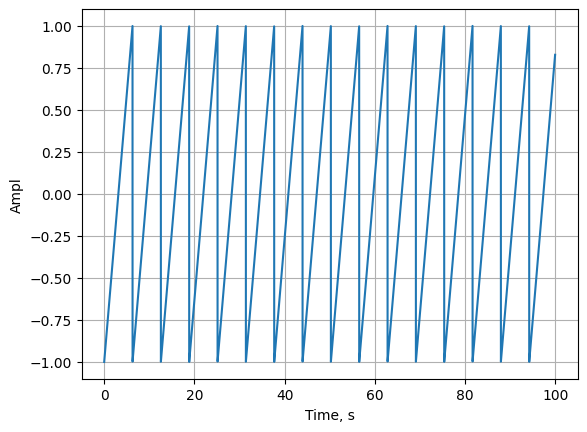

In [15]:
plt.grid() 
plt.xlabel('Time, s') 
plt.ylabel('Ampl') 
plt.plot(t, pil_signal) 

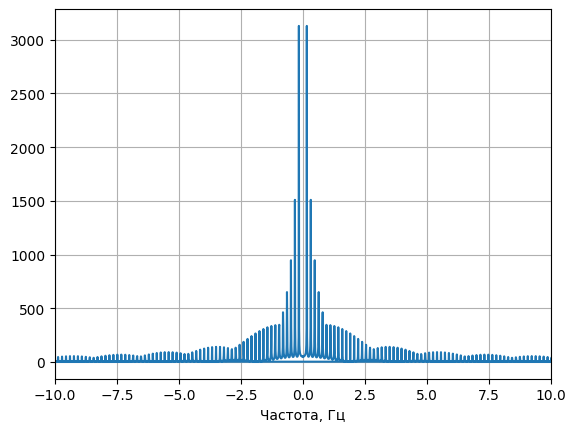

In [16]:
sig_pil_spec = np.abs(np.fft.fft(pil_signal)) 

freqs = np.fft.fftfreq(pil_signal.shape[0], dt)

plt.grid() 
plt.xlabel('Частота, Гц') 
plt.xlim(-10, 10) 
plt.plot(freqs, sig_pil_spec) 

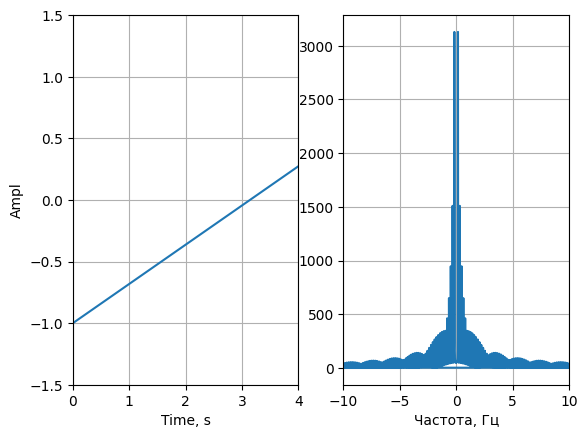

In [17]:
plt.subplot(1, 2, 1) 
plt.grid() 
plt.xlabel('Time, s') 
plt.ylabel('Ampl') 
plt.ylim(-1.5, 1.5) 
plt.xlim(0, 4) 
plt.plot(t, pil_signal) 
 
plt.subplot(1, 2, 2) 
plt.grid() 
plt.xlabel('Частота, Гц') 
plt.xlim(-10, 10) 
plt.plot(freqs, sig_pil_spec)

MeaHDp

In [18]:
mea_signal = signal.square(t)


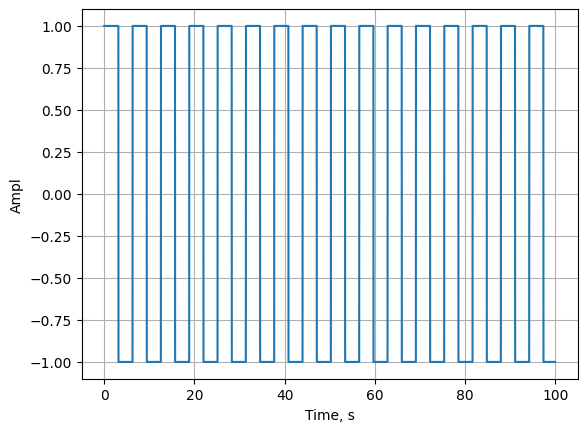

In [19]:
plt.grid() 
plt.xlabel('Time, s') 
plt.ylabel('Ampl') 
plt.plot(t, mea_signal) 



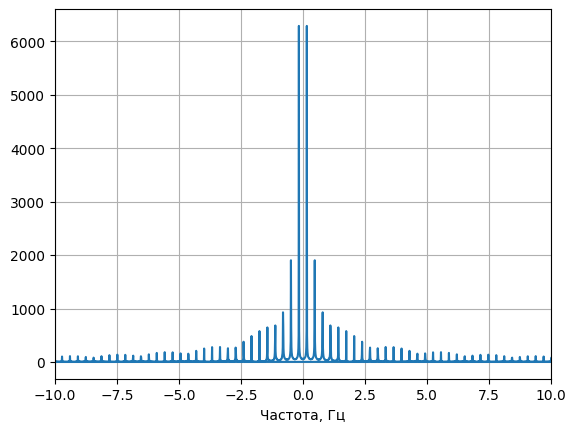

In [20]:
sig_mea_spec = np.abs(np.fft.fft(mea_signal)) 

freqs = np.fft.fftfreq(mea_signal.shape[0], dt)

plt.grid() 
plt.xlabel('Частота, Гц') 
plt.xlim(-10, 10) 
plt.plot(freqs, sig_mea_spec) 

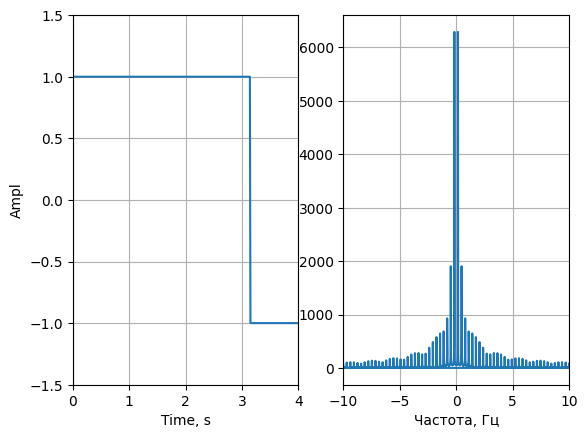

In [21]:
plt.subplot(1, 2, 1) 
plt.grid() 
plt.xlabel('Time, s') 
plt.ylabel('Ampl') 
plt.ylim(-1.5, 1.5) 
plt.xlim(0, 4) 
plt.plot(t, mea_signal) 
 
plt.subplot(1, 2, 2) 
plt.grid() 
plt.xlabel('Частота, Гц') 
plt.xlim(-10, 10) 
plt.plot(freqs, sig_mea_spec)

Типовые НЭ

In [52]:
def relay(sig):
    return np.sign(sig)

In [44]:
def dead_sone(sig, width = 0.5):
    def dead_zone_scalar(x, width = 0.5): 
        if np.abs(x)<width: 
            return 0 
        elif x>0: 
            return x-width 
        else: 
            return x+width 
    out = list(map(dead_zone_scalar, sig))

    return np.array(out)

In [ ]:
def saturation(sig, limit=0.5):
    return np.clip(sig, -limit, limit)

Лаба

In [56]:
sig = {
    'Синусоидальный сигнал':sig_sin,
    'Пилообразный сигнал':pil_signal,
    'Меандр':mea_signal
}
NE_func = {
    "идеальное реле":relay,
    "зона нечувствительности":dead_sone,
    "насыщение":saturation
}

In [105]:
def print_data(sig, NE_funk, title = None):

    fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
    if title:
        fig.suptitle(title)

    ax[0].grid() 
    ax[0].set_title('Сигналы')
    ax[0].set_xlabel('Time, s') 
    ax[0].set_ylabel('Ampl') 
    ax[0].set_xlim(0, 10)
    ax[0].plot(t, sig, 'b', label = 'Исходный сигнал')
    ax[0].plot(t, NE_funk(sig), 'r', label = 'Сигнал прошедший НЭ')

    ax[0].legend(fontsize=7, loc = 'lower right')


    ax[1].grid() 
    ax[1].set_title('Спектр исходного сигнала')
    spec = np.abs(np.fft.fft(sig)) 
    freqs = np.fft.fftfreq(sig.shape[0], dt)
    ax[1].set_xlabel('Частота, Гц') 
    ax[1].set_xlim(-10, 10) 
    ax[1].plot(freqs, spec)


    ax[2].grid() 
    ax[2].set_title('Спектр сигнала НЭ')
    spec = np.abs(np.fft.fft(NE_funk(sig))) 
    freqs = np.fft.fftfreq(NE_funk(sig).shape[0], dt)
    ax[2].set_xlabel('Частота, Гц') 
    ax[2].set_xlim(-10, 10) 
    ax[2].plot(freqs, spec) 

    fig.show()

In [114]:
def print_sig(sig):
    fig, ax = plt.subplots(ncols=3, figsize=(18, 4))
    
    for ind, item in enumerate(sig.keys()):
        ax[ind].grid() 
        ax[ind].set_title(item)
        ax[ind].set_xlabel('Time, s') 
        ax[ind].set_ylabel('Ampl') 
        ax[ind].set_xlim(0, 20)
        ax[ind].plot(t, sig[item])
    
    fig.show()

C:\Users\Filic\AppData\Local\Temp\ipykernel_7720\425642084.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


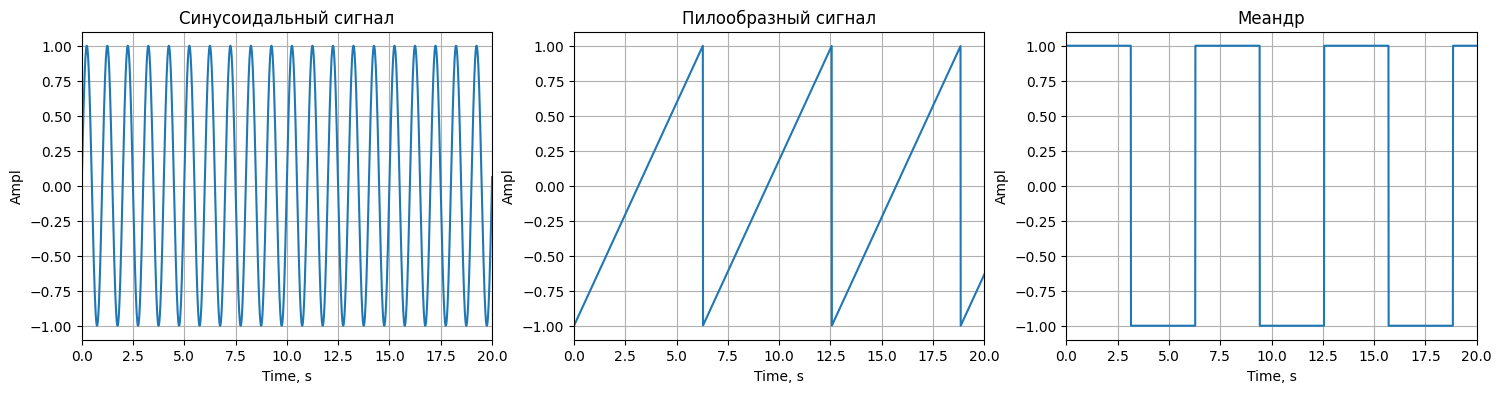

In [115]:
print_sig(sig)

C:\Users\Filic\AppData\Local\Temp\ipykernel_7720\3067807583.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


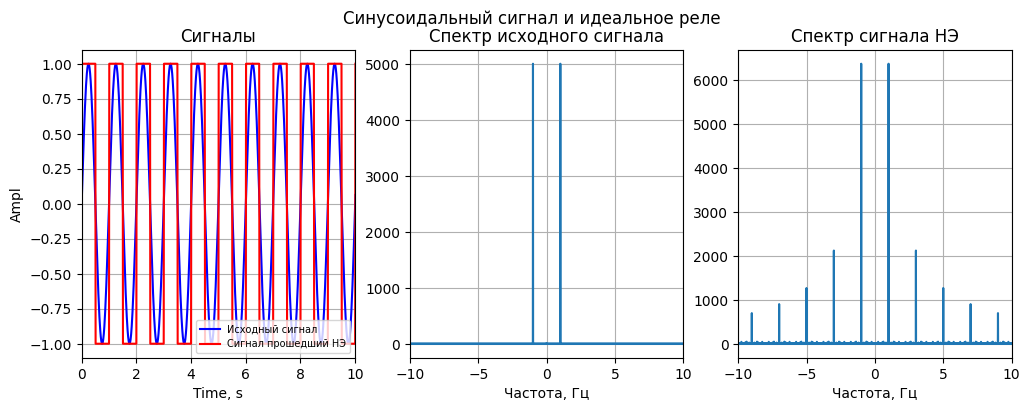

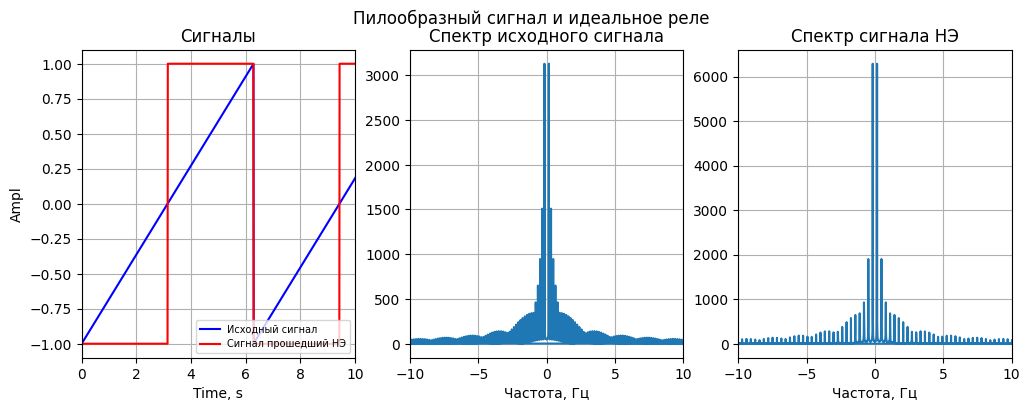

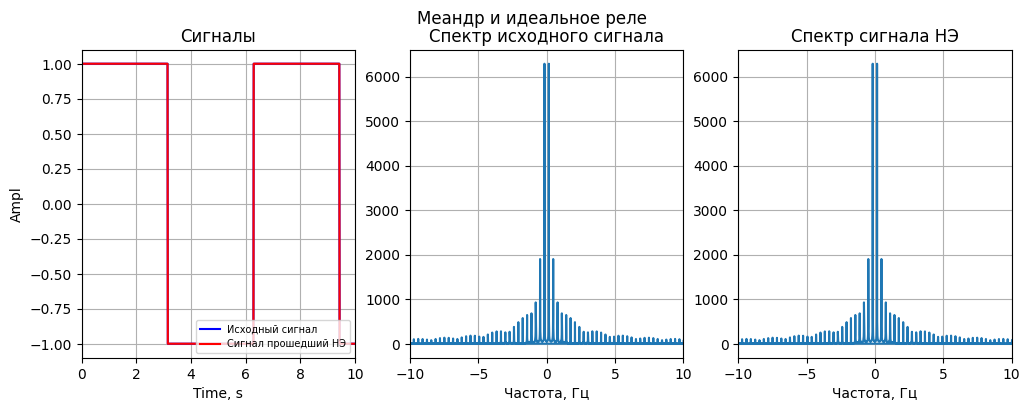

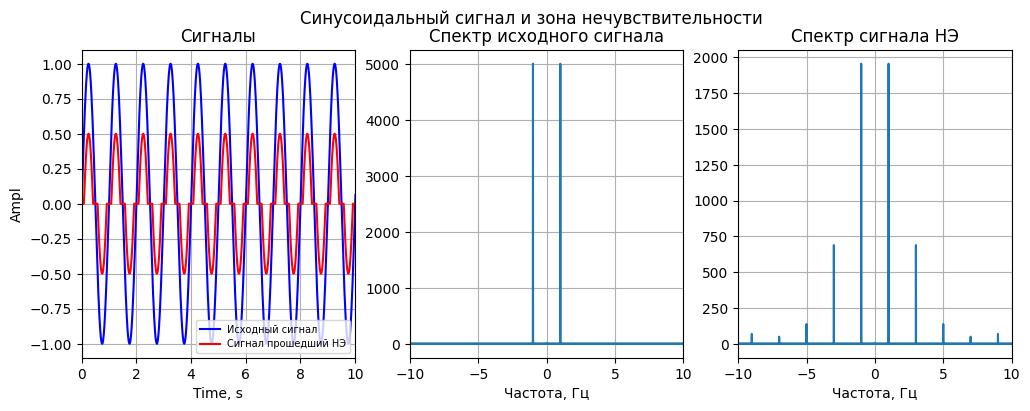

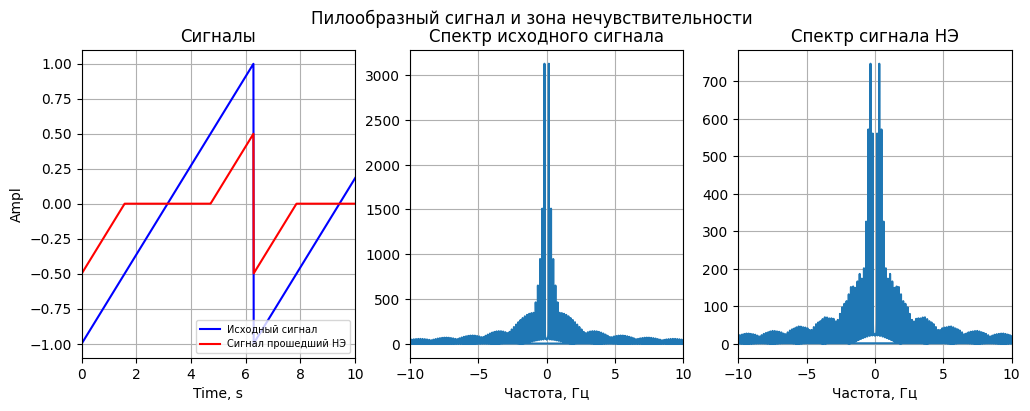

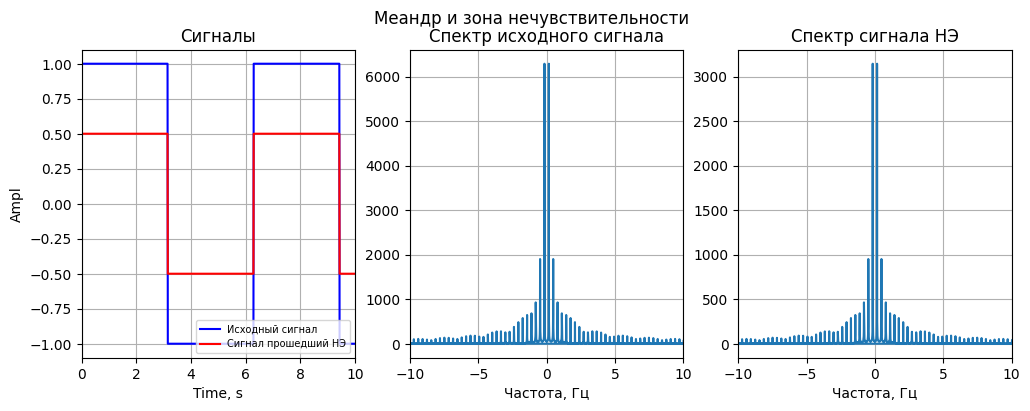

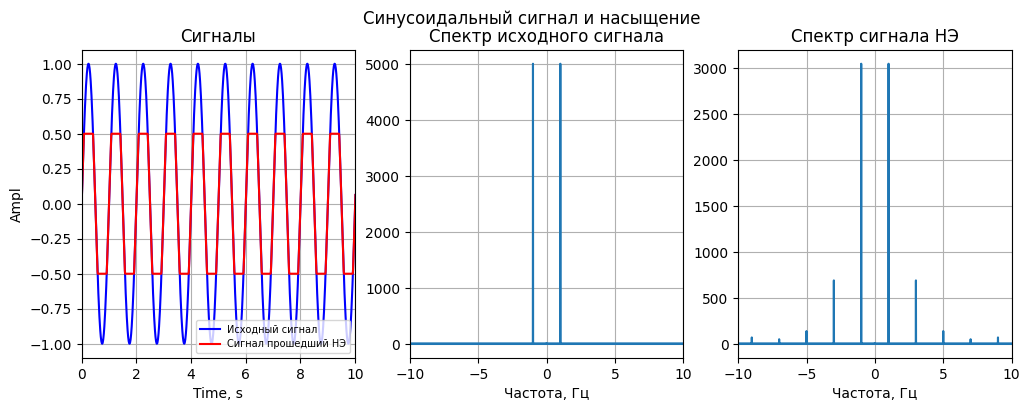

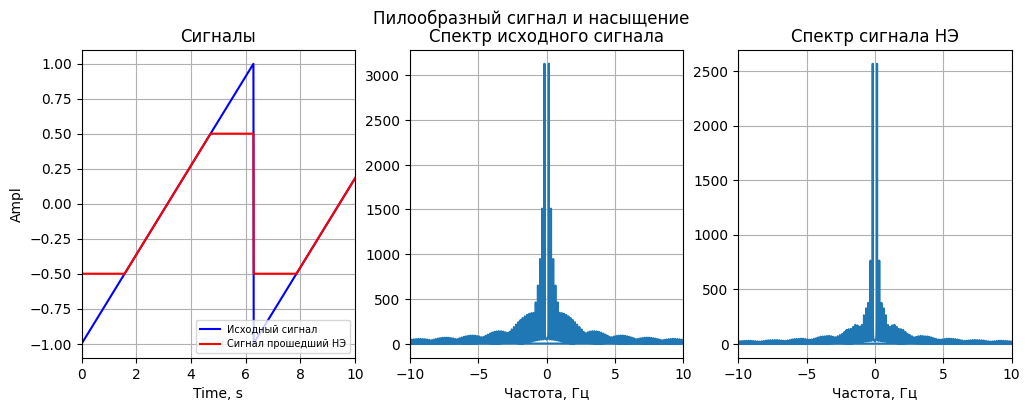

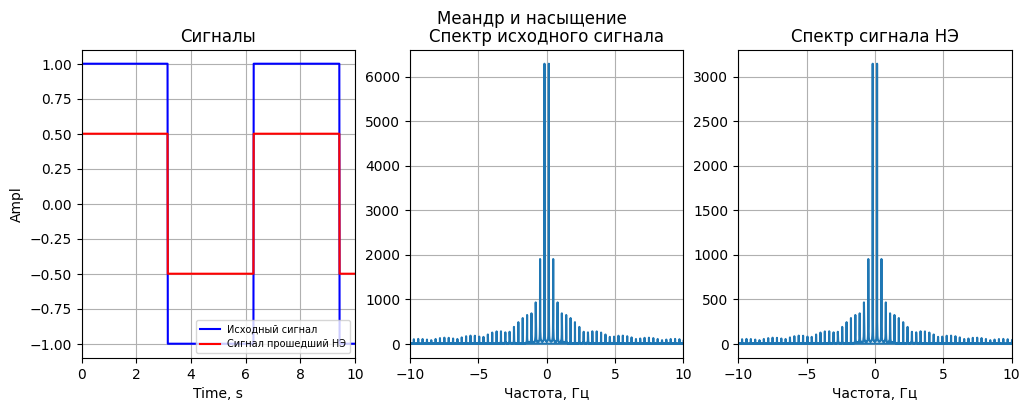

In [116]:
for NE_name in NE_func.keys():
    for sig_name in sig.keys():
        print_data(sig[sig_name], NE_func[NE_name], sig_name+' и '+NE_name)